In [3]:
%matplotlib inline 
#widget
import sys 
import xarray as xr
import numpy as np
import os 
import warnings
import yaml
from random import randint
import math
from datetime import datetime, timedelta

sys.path.append('/home/jvalenti/MOAD/analysis-jose/Source')
from OP_functions import *

In [4]:
config = ['/home/jvalenti/scratch/OParcels_runs/Parcels_outfall/outfall_runs.yaml']
path_runs = '/home/jvalenti/MOAD/results/Graham/' 
paths = path(0)
# Suppress FutureWarning messages
warnings.simplefilter(action='ignore', category=FutureWarning)

path_NEMO = make_prefix(datetime(2019, 1, 1),paths['NEMO'])

jjii = xr.open_dataset('~/MOAD/grid/grid_from_lat_lon_mask999.nc')
finder(jjii,48,-123)

(193, 200)

In [5]:
coords = xr.open_dataset('/home/jvalenti/MOAD/grid/coordinates_seagrid_SalishSea201702.nc', decode_times=False)
mask = xr.open_dataset('/home/jvalenti/MOAD/grid2/mesh_mask202108_TDV.nc')

Text(0.5, 1.0, 'Salish Sea subregions')

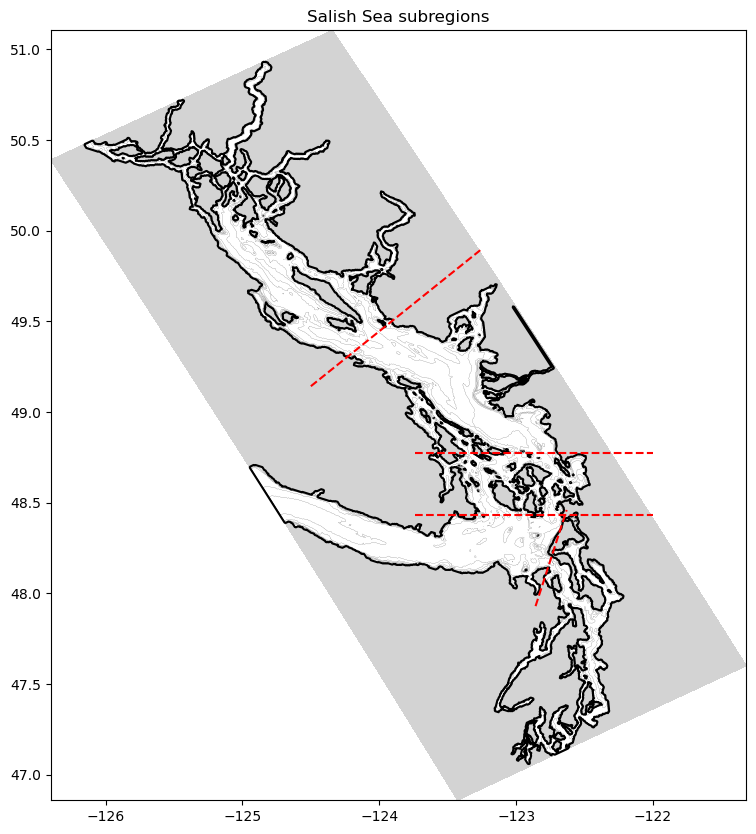

In [6]:
from matplotlib import pyplot as plt, animation, rc,colors
import cmocean
cm = cmocean.cm.dense

fig, ax = plt.subplots(1,1,figsize=(10, 10))

ax.contour(coords.nav_lon, coords.nav_lat, mask.mbathy[0,:,:],colors='k',linewidths=0.1)
ax.contourf(coords.nav_lon, coords.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray')
ax.contour(coords.nav_lon, coords.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k')
#aa = ax.hist2d(DS.lon,DS.lat,100,cmap =cm,vmin=1e-5,vmax=2000)
ax.set_aspect(1/np.sin(np.deg2rad(49)))
Xline = np.linspace(-124.5,-122,100)
yline0 = (7/3)*Xline+334.6
yline1 = (20/33)*Xline+124.597
yline2 = np.zeros_like(Xline)+48.43
yline3 = np.zeros_like(Xline)+48.774
plt.plot(Xline[65:75],yline0[65:75],'r--')
plt.plot(Xline[:50],yline1[:50],'r--')
plt.plot(Xline[30:],yline2[30:],'r--')
plt.plot(Xline[30:],yline3[30:],'r--')

plt.title('Salish Sea subregions')

In [7]:
def counting(DS,month,axs,fact=1):
    DSb = DS[DS.status==2]
    DSe = DS[DS.status==3]
    DSs = DS[DS.status==1]
    count = []
    countb = []
    counte = []
    depthb = []
    for i in range(ds.dims['obs']-1):
        times= np.min(DS.time)+i*6*3600
        count.append(len(DSs[DSs.time == times]))
        counte.append(len(DSe[DSe.time == times]))
        countb.append(len(DSb[DSb.time == times]))
        depthb.append(np.mean(DSs[DSs.time == times].z*DSs[DSs.time == times].fact))
    axs[0,0].plot(x2,np.array(count)/fact,label = month)
    axs[1,0].plot(x2,np.array(countb)/fact,'--',label = 'Beached')
    twin3.plot(x2,np.array(counte)/fact,label = ' Sedimented')
    axs[1,0].set_ylim([-1e4,1.2e5])
    twin3.set_ylim([-1e4,1.2e5])
    beached = [(c - countb[i-1])/count[i] for i,c in enumerate(countb)]
    sediment = [(c - counte[i-1])/count[i] for i,c in enumerate(counte)]
    axs[0,1].plot(x2[1:],beached[1:],label = 'Beaching rate')
    # twin1.plot(x2,depthb,'--',label = 'Avg Depth')
    axs[1,1].plot(x[1:],sediment[1:],label = 'Sedimentation rate')
    return #count,counte,countb,beached,sediment

In [8]:
import pandas as pd
Point_At = pd.read_csv('Book1.csv')
Time=np.linspace(0,365,8017)

In [11]:
runs = {'2%':['alpha120190101.nc',2],'1%':['alpha_1_jan.nc',2],'0.5%':['alpha220190101.nc',2],'0.2%':['Runs_alpha0220190101_.nc',1],'0.1%':['Run_Enero20190101_.nc',2],'0.05%':['Runs_alpha0520190101_.nc',1],'0.01%':['Runs_alpha0120190101_.nc',1]}

months = {'Jan':['Run_Enero20190101_.nc',1],'Feb':['Run_Febrero20190201_.nc',32],'Mar':['Run_Marzo20190301_.nc',61],'Jun':['Run_Junio20190601_.nc',152],'Jul':['Run_Julio20190701_.nc',183],'Aug':['Run_Agosto20190801_.nc',214]}

sub_areas=['Puget','JdF','Haro','NSoG','CSSoG']
def cutting(data,area):
    if area=='Puget':
        data_new = data[data.lat<48.43]
        data_new = data_new[data_new.lat<(7/3)*data_new.lon+334.6]
    elif area=='JdF':
        data_new = data[data.lat<48.43]
        data_new = data_new[data_new.lat>(7/3)*data_new.lon+334.6]
    elif area=='Haro':  
        data_new = data[data.lat<48.774]
        data_new = data_new[data_new.lat>48.43]  
    elif area=='NSoG':
        data_new = data[data.lat>(20/33)*data.lon+124.597]
    elif area=='CSSoG': 
        data_new = data[data.lat>48.774] 
        data_new = data_new[data_new.lat<(20/33)*data_new.lon+124.597]
    else:
        print('Unrecognized subarea')  
    return data_new


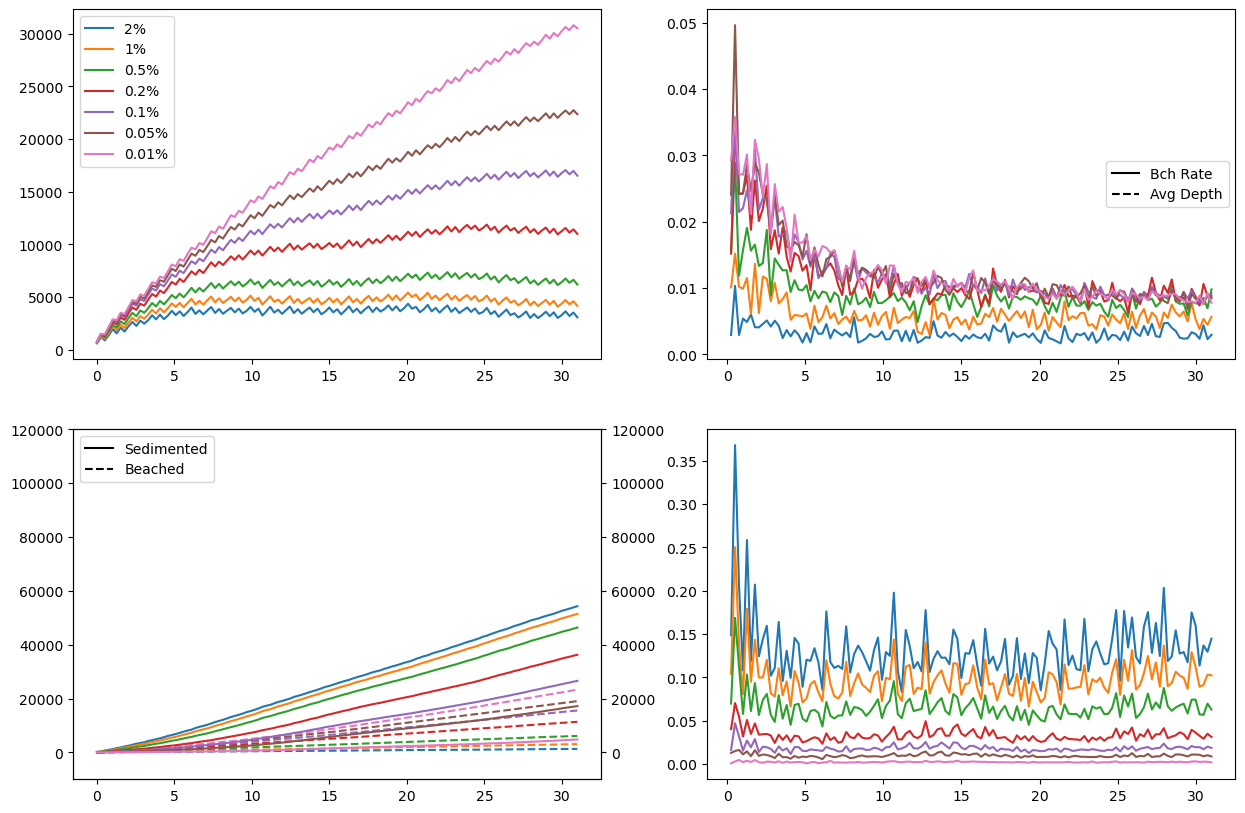

In [12]:
fig,axs = plt.subplots(2,2,figsize=(15,10))
twin3 = axs[1,0].twinx()
for alpha in runs:
    ds = xr.open_dataset(path_runs+runs[alpha][0], decode_times=False)
    x = np.linspace(0,31,ds.dims['obs']-1)
    x2 = np.linspace(0,31,ds.dims['obs']-1)
    DS = ds.to_dataframe()
    DS = DS.dropna()
    DS = DS[DS.time>0]
    DS = cutting(DS,'Puget')
    counting(DS,alpha,axs,runs[alpha][1])
axs[0,0].legend()
legend_lines = [plt.Line2D([0], [0], color='black', linestyle='-'),
                plt.Line2D([0], [0], color='black', linestyle='--')]
axs[1,0].legend(legend_lines,['Sedimented','Beached'], loc = 'upper left')
axs[0,1].legend(legend_lines,['Bch Rate','Avg Depth'], loc = 'center right')

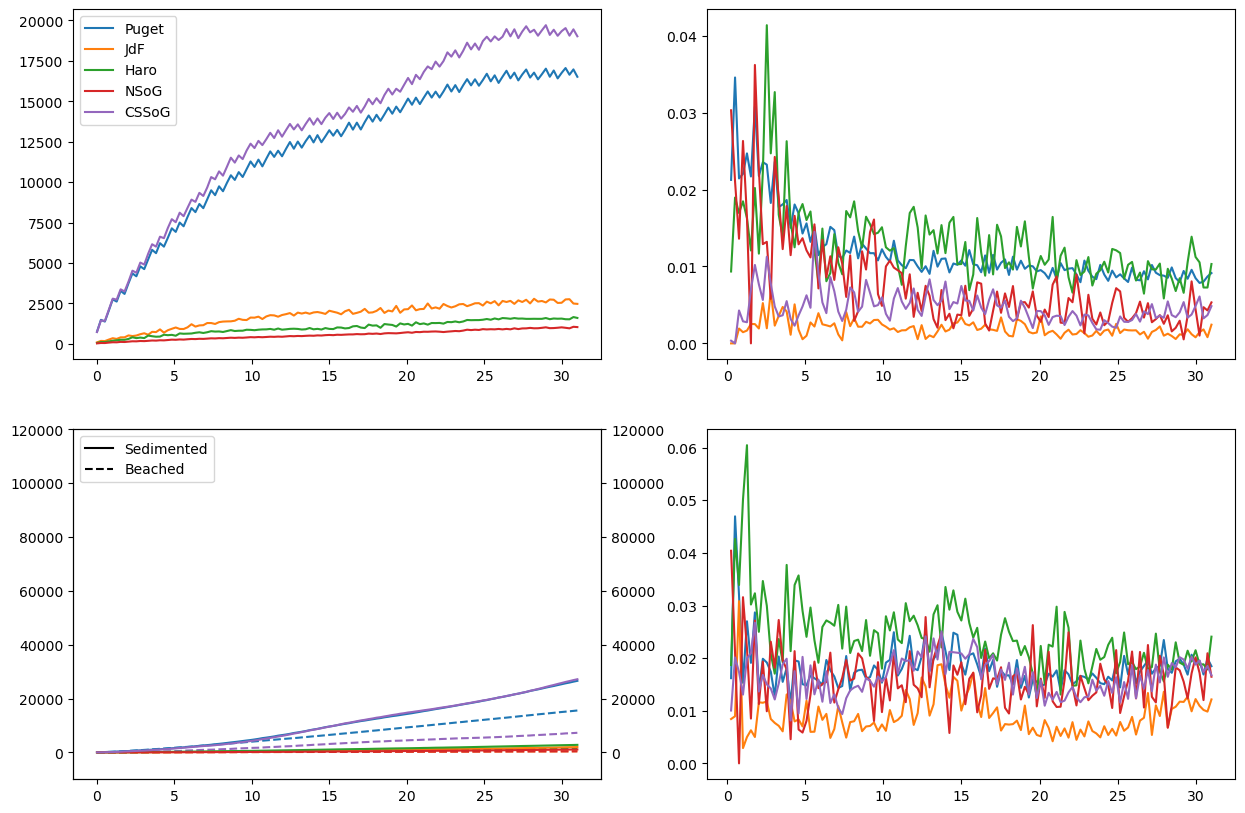

In [16]:
fig,axs = plt.subplots(2,2,figsize=(15,10))
twin3 = axs[1,0].twinx()
alpha = '0.1%'
ds = xr.open_dataset(path_runs+runs[alpha][0], decode_times=False)
x = np.linspace(0,31,ds.dims['obs']-1)
x2 = np.linspace(0,31,ds.dims['obs']-1)
DS = ds.to_dataframe()
DS = DS.dropna()
DS = DS[DS.time>0]
for area in sub_areas:
    DSn = cutting(DS,area)
    counting(DSn,area,axs,runs[alpha][1])
axs[0,0].legend()
legend_lines = [plt.Line2D([0], [0], color='black', linestyle='-'),
                plt.Line2D([0], [0], color='black', linestyle='--')]
axs[1,0].legend(legend_lines,['Sedimented','Beached'], loc = 'upper left')

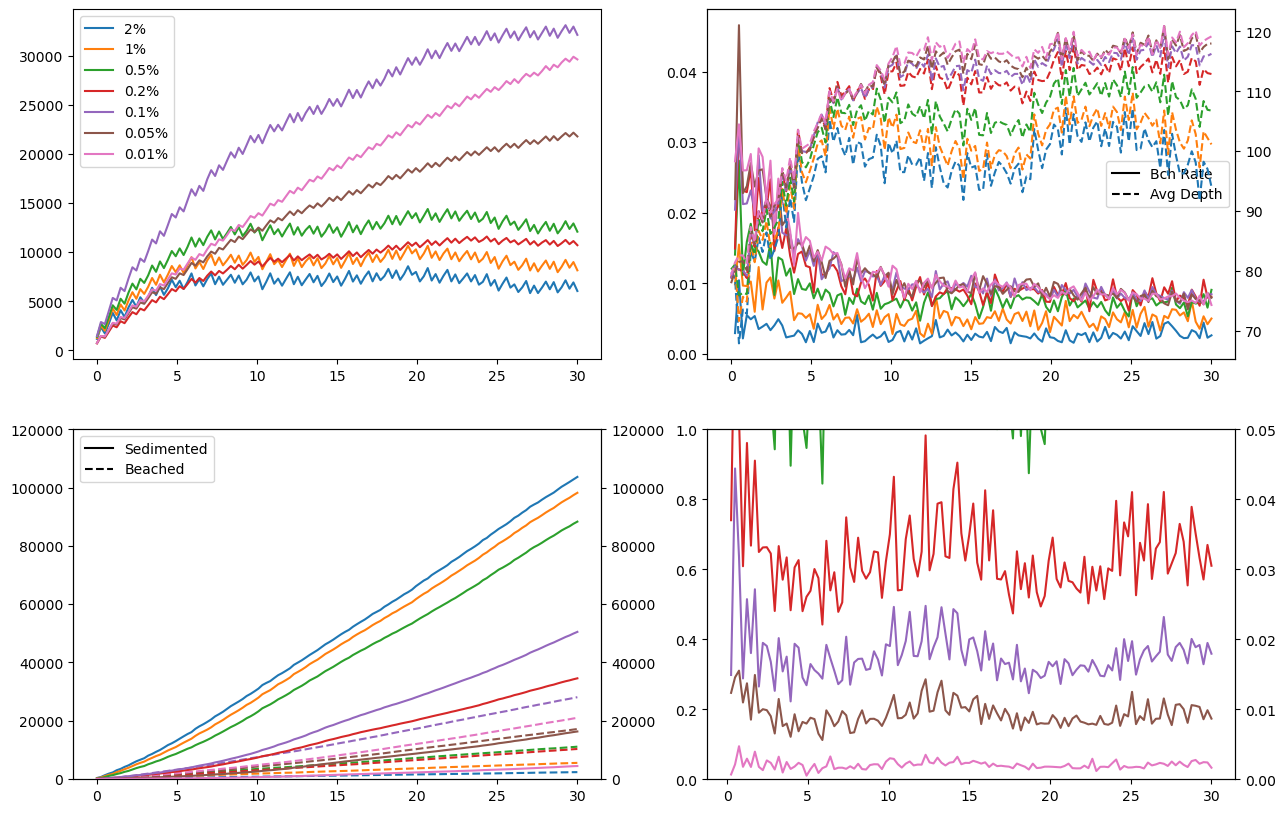

In [83]:

fig,axs = plt.subplots(2,2,figsize=(15,10))
twin1 = axs[0,1].twinx()
twin2 = axs[1,1].twinx()
twin3 = axs[1,0].twinx()
#axs[1,1].plot(Time,np.array(Point_At.ssh[1:],dtype='f'),c='grey',alpha=0.4,label='SSH')
for month in runs:
    ds = xr.open_dataset(path_runs+runs[month][0], decode_times=False)
    x = np.linspace(0,30,ds.dims['obs']-1)
    x2 = np.linspace(0,30,ds.dims['obs']-1)
    DS = ds.to_dataframe()
    DS = DS.dropna()
    DS = DS[DS.time>0]
    DS = DS[DS.lat<48]
    counting(DS,month,axs)
axs[0,0].legend()
legend_lines = [plt.Line2D([0], [0], color='black', linestyle='-'),
                plt.Line2D([0], [0], color='black', linestyle='--')]
axs[1,0].legend(legend_lines,['Sedimented','Beached'], loc = 'upper left')
axs[0,1].legend(legend_lines,['Bch Rate','Avg Depth'], loc = 'center right')

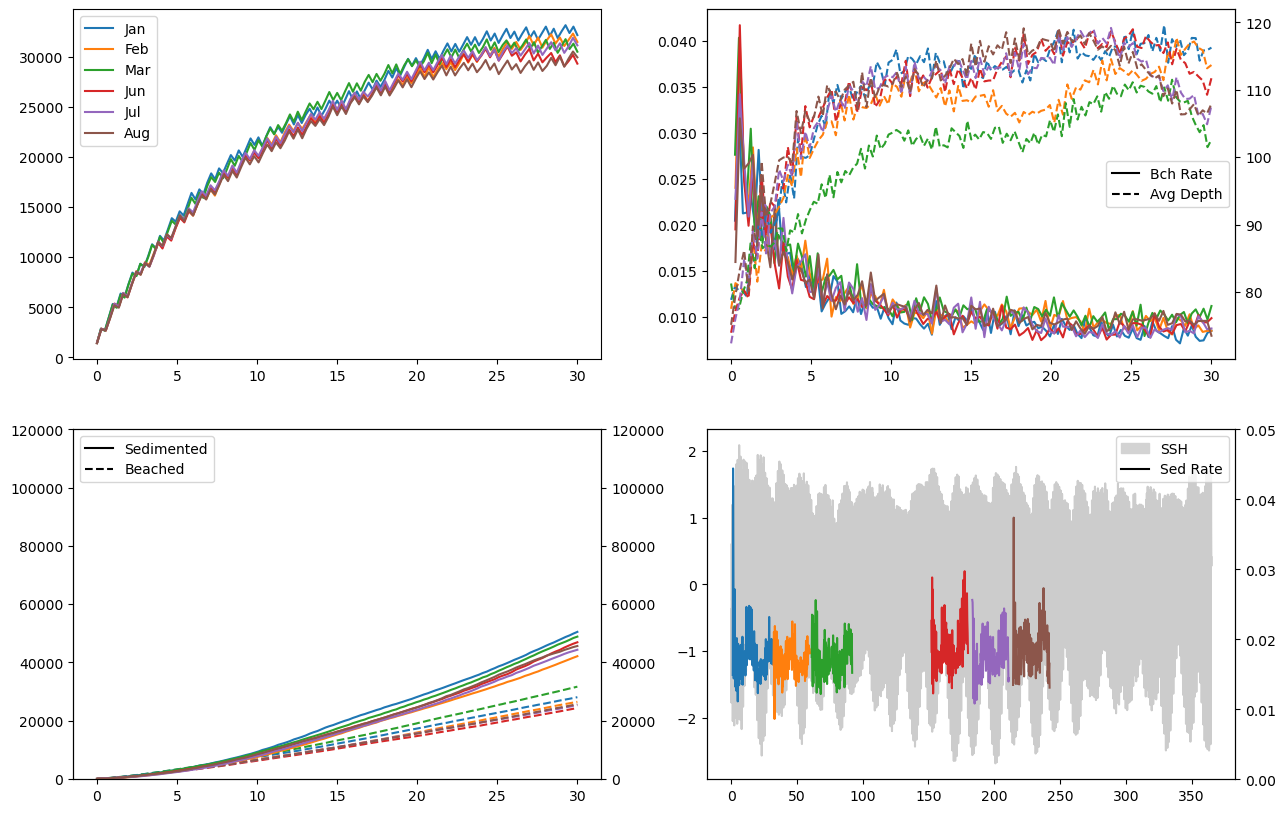

In [84]:
import matplotlib.patches as mpatches

path_runs = '/home/jvalenti/MOAD/results/Graham/'

fig,axs = plt.subplots(2,2,figsize=(15,10))
twin1 = axs[0,1].twinx()
twin2 = axs[1,1].twinx()
twin3 = axs[1,0].twinx()
axs[1,1].plot(Time,np.array(Point_At.ssh[1:],dtype='f'),c='grey',alpha=0.4,label='SSH')
for month in months:
    ds = xr.open_dataset(path_runs+runs[month][0], decode_times=False)
    x = np.linspace(runs[month][1],int(runs[month][1]+ds.dims['obs']/4),ds.dims['obs']-1)
    x2 = np.linspace(0,30,ds.dims['obs']-1)
    DS = ds.to_dataframe()
    DS = DS.dropna()
    DS = DS[DS.time>0]
    DS = DS[DS.lat<48]
    counting(DS,month,axs)
axs[0,0].legend()
legend_lines = [plt.Line2D([0], [0], color='black', linestyle='-'),
                plt.Line2D([0], [0], color='black', linestyle='--')]
axs[1,0].legend(legend_lines,['Sedimented','Beached'], loc = 'upper left')
axs[0,1].legend(legend_lines,['Bch Rate','Avg Depth'], loc = 'center right')

solid_block = mpatches.Patch(color='lightgrey', label='Solid Block')
legend_lines2 = [solid_block,
                plt.Line2D([0], [0], color='black', linestyle='-')]

axs[1,1].legend(legend_lines2,['SSH','Sed Rate'], loc = 'upper right')

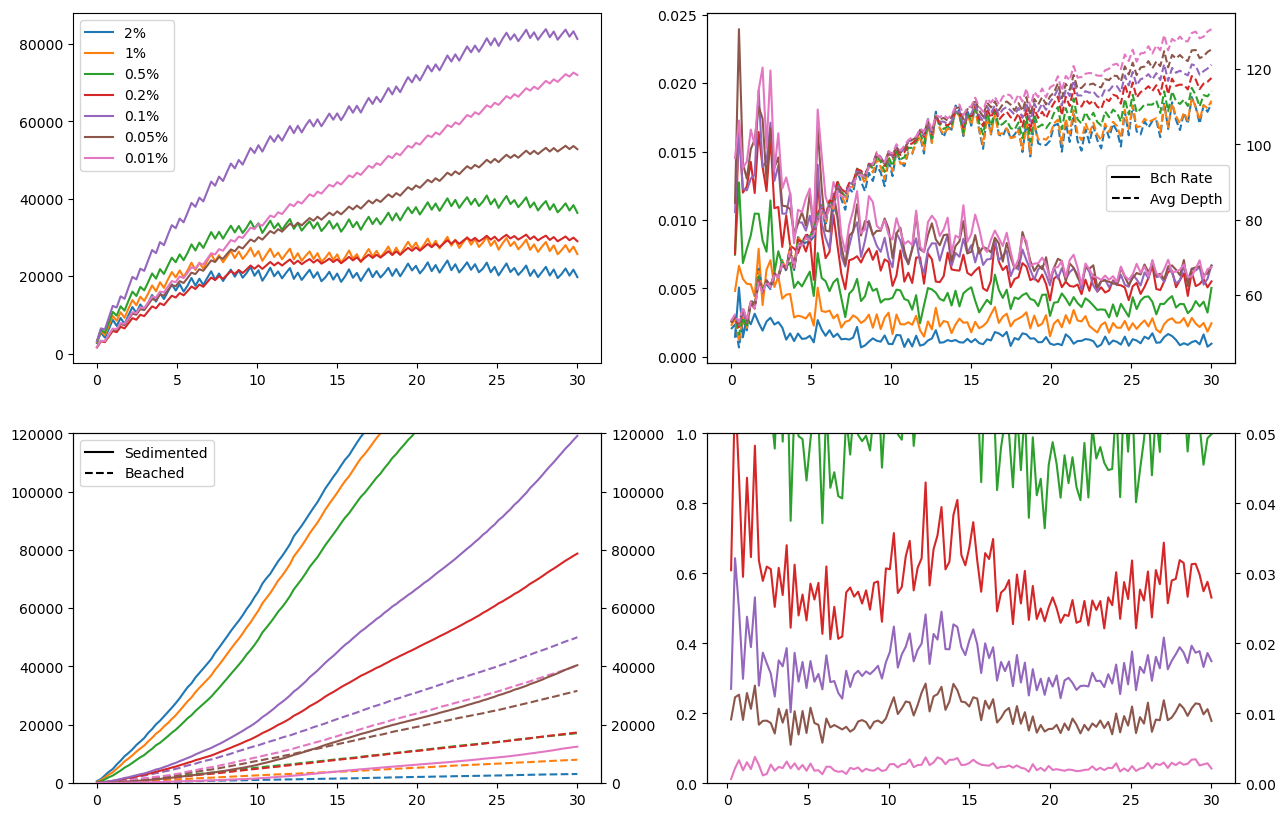

In [85]:
import matplotlib.patches as mpatches
runs = {'2%':['alpha120190101.nc',152],'1%':['alpha_1_jan.nc',1],'0.5%':['alpha220190101.nc',183],'0.2%':['Runs_alpha0220190101_.nc',61],'0.1%':['Run_Enero20190101_.nc',214],'0.05%':['Runs_alpha0520190101_.nc',12],'0.01%':['Runs_alpha0120190101_.nc',32]}
fig,axs = plt.subplots(2,2,figsize=(15,10))
twin1 = axs[0,1].twinx()
twin2 = axs[1,1].twinx()
twin3 = axs[1,0].twinx()
#axs[1,1].plot(Time,np.array(Point_At.ssh[1:],dtype='f'),c='grey',alpha=0.4,label='SSH')
for month in runs:
    ds = xr.open_dataset(path_runs+runs[month][0], decode_times=False)
    x = np.linspace(0,30,ds.dims['obs']-1)
    x2 = np.linspace(0,30,ds.dims['obs']-1)
    DS = ds.to_dataframe()
    DS = DS.dropna()
    DS = DS[DS.time>0]
    counting(DS,month,axs)
axs[0,0].legend()
legend_lines = [plt.Line2D([0], [0], color='black', linestyle='-'),
                plt.Line2D([0], [0], color='black', linestyle='--')]
axs[1,0].legend(legend_lines,['Sedimented','Beached'], loc = 'upper left')
axs[0,1].legend(legend_lines,['Bch Rate','Avg Depth'], loc = 'center right')

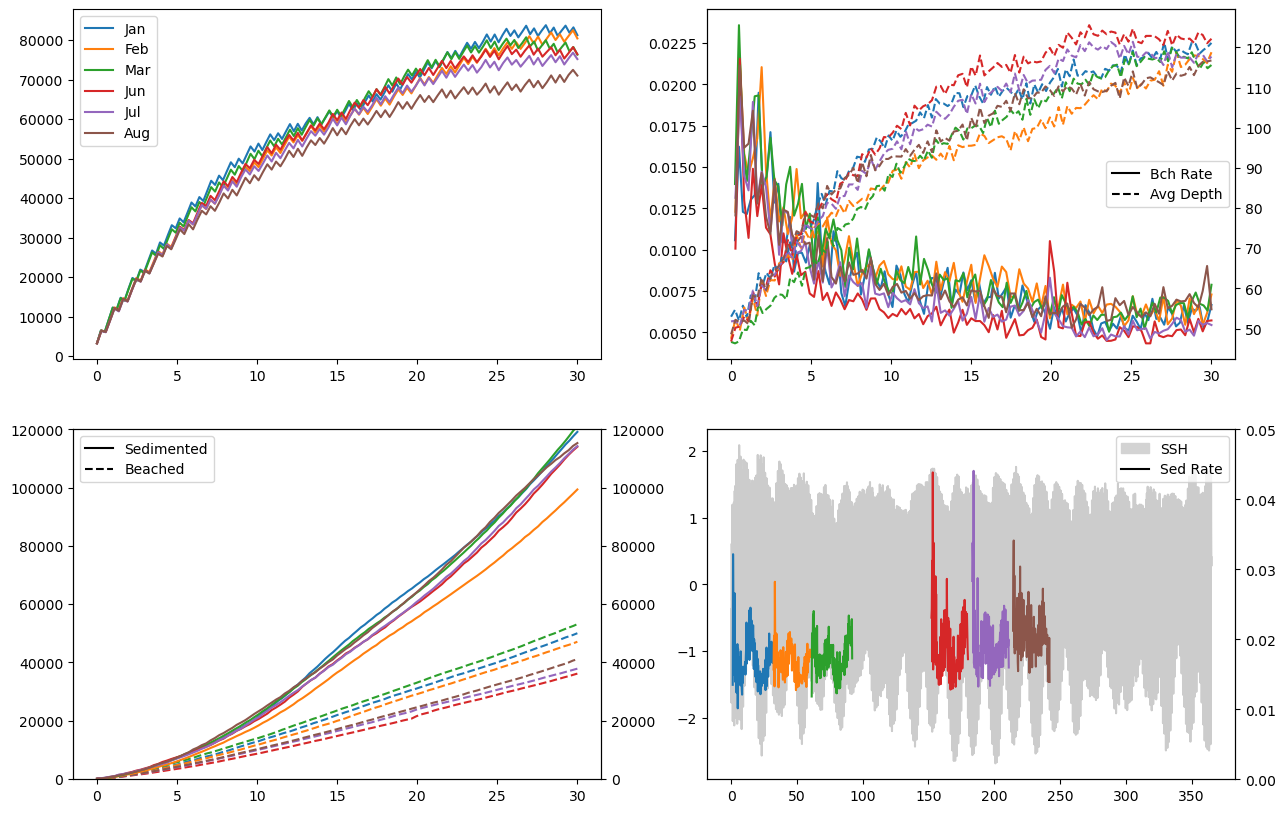

In [86]:
import matplotlib.patches as mpatches

path_runs = '/home/jvalenti/MOAD/results/Graham/'
runs = {'Jan':['Run_Enero20190101_.nc',1],'Feb':['Run_Febrero20190201_.nc',32],'Mar':['Run_Marzo20190301_.nc',61],'Jun':['Run_Junio20190601_.nc',152],'Jul':['Run_Julio20190701_.nc',183],'Aug':['Run_Agosto20190801_.nc',214]}
fig,axs = plt.subplots(2,2,figsize=(15,10))
twin1 = axs[0,1].twinx()
twin2 = axs[1,1].twinx()
twin3 = axs[1,0].twinx()
axs[1,1].plot(Time,np.array(Point_At.ssh[1:],dtype='f'),c='grey',alpha=0.4,label='SSH')
for month in runs:
    ds = xr.open_dataset(path_runs+runs[month][0], decode_times=False)
    x = np.linspace(runs[month][1],int(runs[month][1]+ds.dims['obs']/4),ds.dims['obs']-1)
    x2 = np.linspace(0,30,ds.dims['obs']-1)
    DS = ds.to_dataframe()
    DS = DS.dropna()
    DS = DS[DS.time>0]
    counting(DS,month,axs)
axs[0,0].legend()
legend_lines = [plt.Line2D([0], [0], color='black', linestyle='-'),
                plt.Line2D([0], [0], color='black', linestyle='--')]
axs[1,0].legend(legend_lines,['Sedimented','Beached'], loc = 'upper left')
axs[0,1].legend(legend_lines,['Bch Rate','Avg Depth'], loc = 'center right')

solid_block = mpatches.Patch(color='lightgrey', label='Solid Block')
legend_lines2 = [solid_block,
                plt.Line2D([0], [0], color='black', linestyle='-')]

axs[1,1].legend(legend_lines2,['SSH','Sed Rate'], loc = 'upper right')

Text(0.5, 1.0, 'Salish Sea subregions')

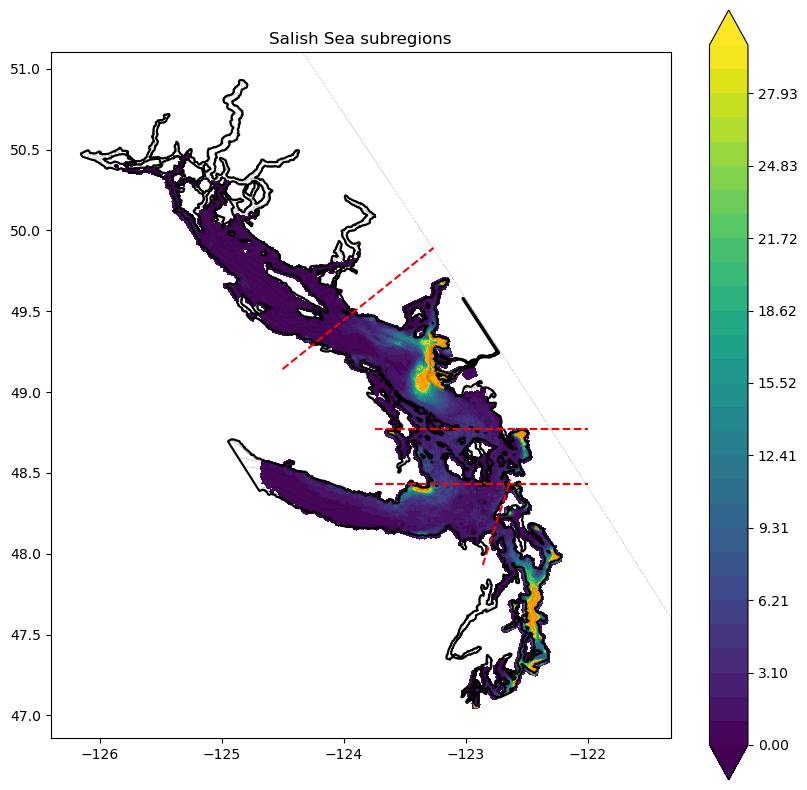

In [87]:
from matplotlib import pyplot as plt, animation, rc,colors
import cmocean
cm = cmocean.cm.dense
levels = np.linspace(1e-5,30,30)
fig, ax = plt.subplots(1,1,figsize=(10, 10))
conc = np.load(path_runs+'Run_Enero20190101_.nc.npy')
conc2 = np.load(path_runs+'Run_Febrero20190201_.nc.npy')
conc3 = np.load(path_runs+'Run_Marzo20190301_.nc.npy')
conc_winter = (conc + conc2 + conc3)/3

conc = np.load(path_runs+'Run_Junio20190601_.nc.npy')
conc2 = np.load(path_runs+'Run_Julio20190701_.nc.npy')
conc3 = np.load(path_runs+'Run_Agosto20190801_.nc.npy')
conc_summer = (conc + conc2 + conc3)/3

conc_summer = np.load(path_runs+'Runs_alpha0120190101_.npy')
Ni = 3

ax.contour(coords.nav_lon, coords.nav_lat, mask.mbathy[0,:,:],colors='k',linewidths=0.1)
ax.contourf(coords.nav_lon, coords.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray')
ax.contour(coords.nav_lon, coords.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k')
aa = ax.contourf(coords.nav_lon[::Ni,::Ni], coords.nav_lat[::Ni,::Ni],np.sum(conc_summer[:30,:,:],axis=0),levels=levels,extend='both')
plt.colorbar(aa)
aa.cmap.set_over('orange')
aa.cmap.set_under('white')
#aa = ax.hist2d(DS.lon,DS.lat,100,cmap =cm,vmin=1e-5,vmax=2000)
ax.set_aspect(1/np.sin(np.deg2rad(49)))
Xline = np.linspace(-124.5,-122,100)
yline0 = (7/3)*Xline+334.6
yline1 = (20/33)*Xline+124.597
yline2 = np.zeros_like(Xline)+48.43
yline3 = np.zeros_like(Xline)+48.774
plt.plot(Xline[65:75],yline0[65:75],'r--')
plt.plot(Xline[:50],yline1[:50],'r--')
plt.plot(Xline[30:],yline2[30:],'r--')
plt.plot(Xline[30:],yline3[30:],'r--')
plt.title('Salish Sea subregions')